In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns


## Loading dataset

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#to display basic input about the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#to disply ro. of smaples on each class
df['species'].value_counts().reset_index()


,species,count
0,setosa,50
1,versicolor,50
2,virginica,50


In [7]:
# Preprocessing the dataset

In [8]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

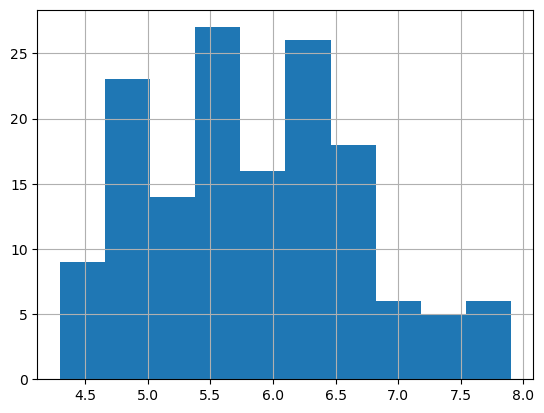

In [9]:
df['sepal_length'].hist()

<Axes: >

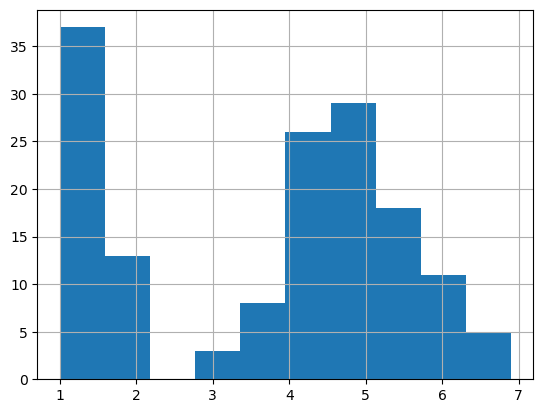

In [10]:
df['petal_length'].hist()

<Axes: >

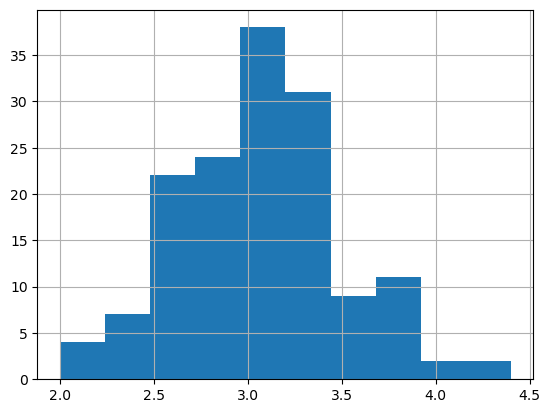

In [11]:
df['sepal_width'].hist()

<Axes: >

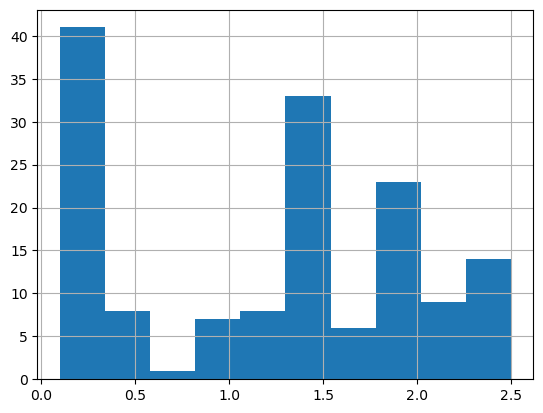

In [12]:
df['petal_width'].hist()


In [13]:
#scatterplot
colors=['red', 'orange','blue']
species =['setosa','virginica','versicolor']

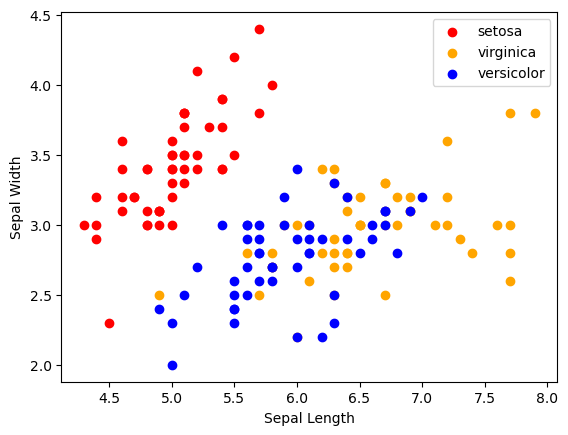

In [14]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

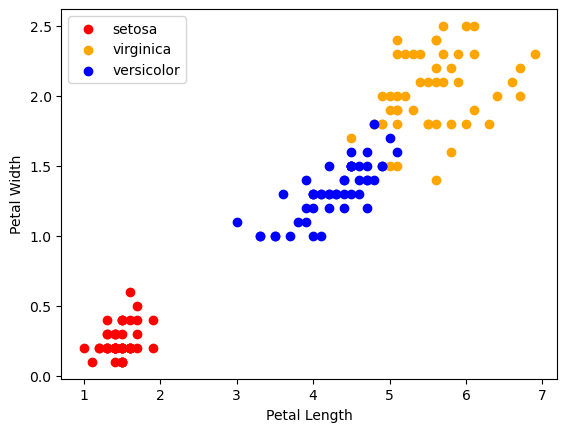

In [15]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

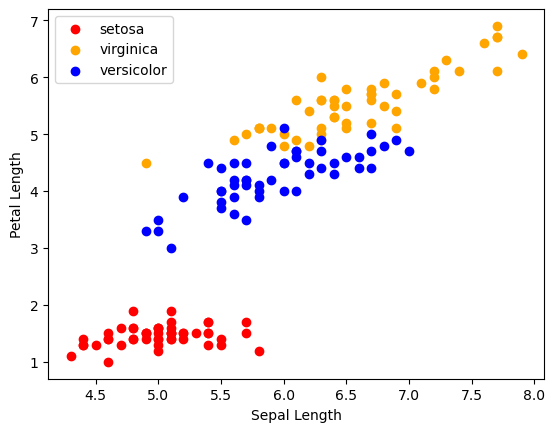

In [16]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

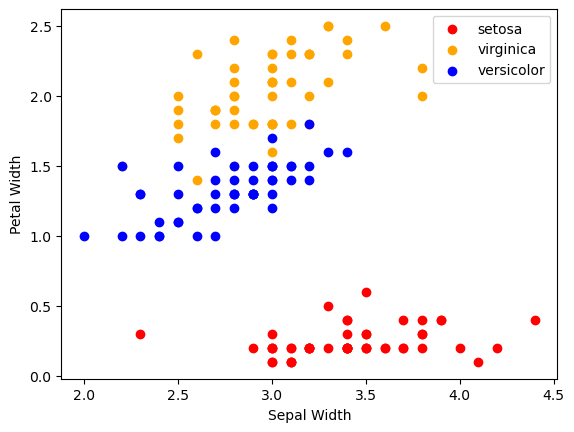

In [17]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

In [18]:
# Correlation Matrix

In [21]:
df_num=df.select_dtypes(include=['float64'])
df_num.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

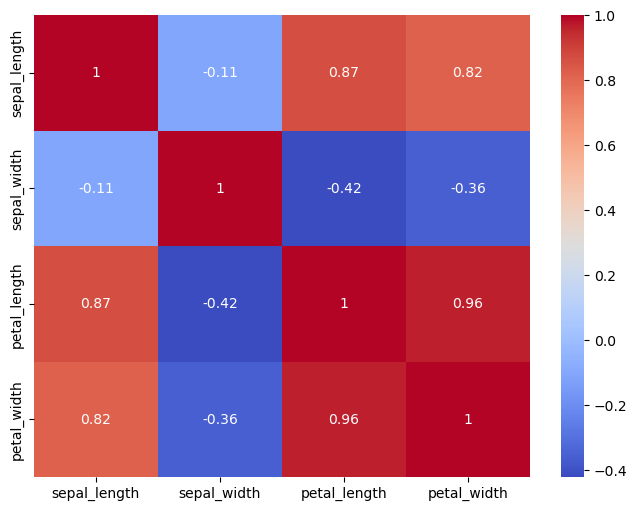

In [37]:
corr= df_num.corr()
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr,annot=True,ax=ax, cmap = 'coolwarm') 

## Label Encoder

#### label encoding refers to converts the labels in to numeric form so as to convert it into the machine readable form


In [50]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [58]:
df['species']= le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [120]:
from sklearn.model_selection import train_test_split

#train -70
#test-30
X=df.drop(columns=['species'])
Y=df['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [122]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [124]:
#model training
model.fit(x_train,y_train)
# print metric to get performance
print('Accuracy:',model.score(x_test,y_test )*100)

Accuracy: 100.0


In [126]:
#knn-K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()


In [114]:
#model training
model.fit(x_train,y_train)
# print metric to get performance
print('Accuracy:',model.score(x_test,y_test )*100)

Accuracy: 95.55555555555556


In [116]:
# decision trees
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [118]:
#model training
model.fit(x_train,y_train)
# print metric to get performance
print('Accuracy:',model.score(x_test,y_test )*100)

Accuracy: 95.55555555555556
